In [1]:
import sys
sys.path.insert(0,'..')

from sktime_analysis import *

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import (
    ColumnEnsembleClassifier
)
from sktime.classification.frequency_based import RandomIntervalSpectralForest
from sktime.transformers.panel.compose import ColumnConcatenator

Column Concatenation Score: 0.8487804878048781
Column Ensemble Score: 0.8853658536585366


/home/kschuma/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

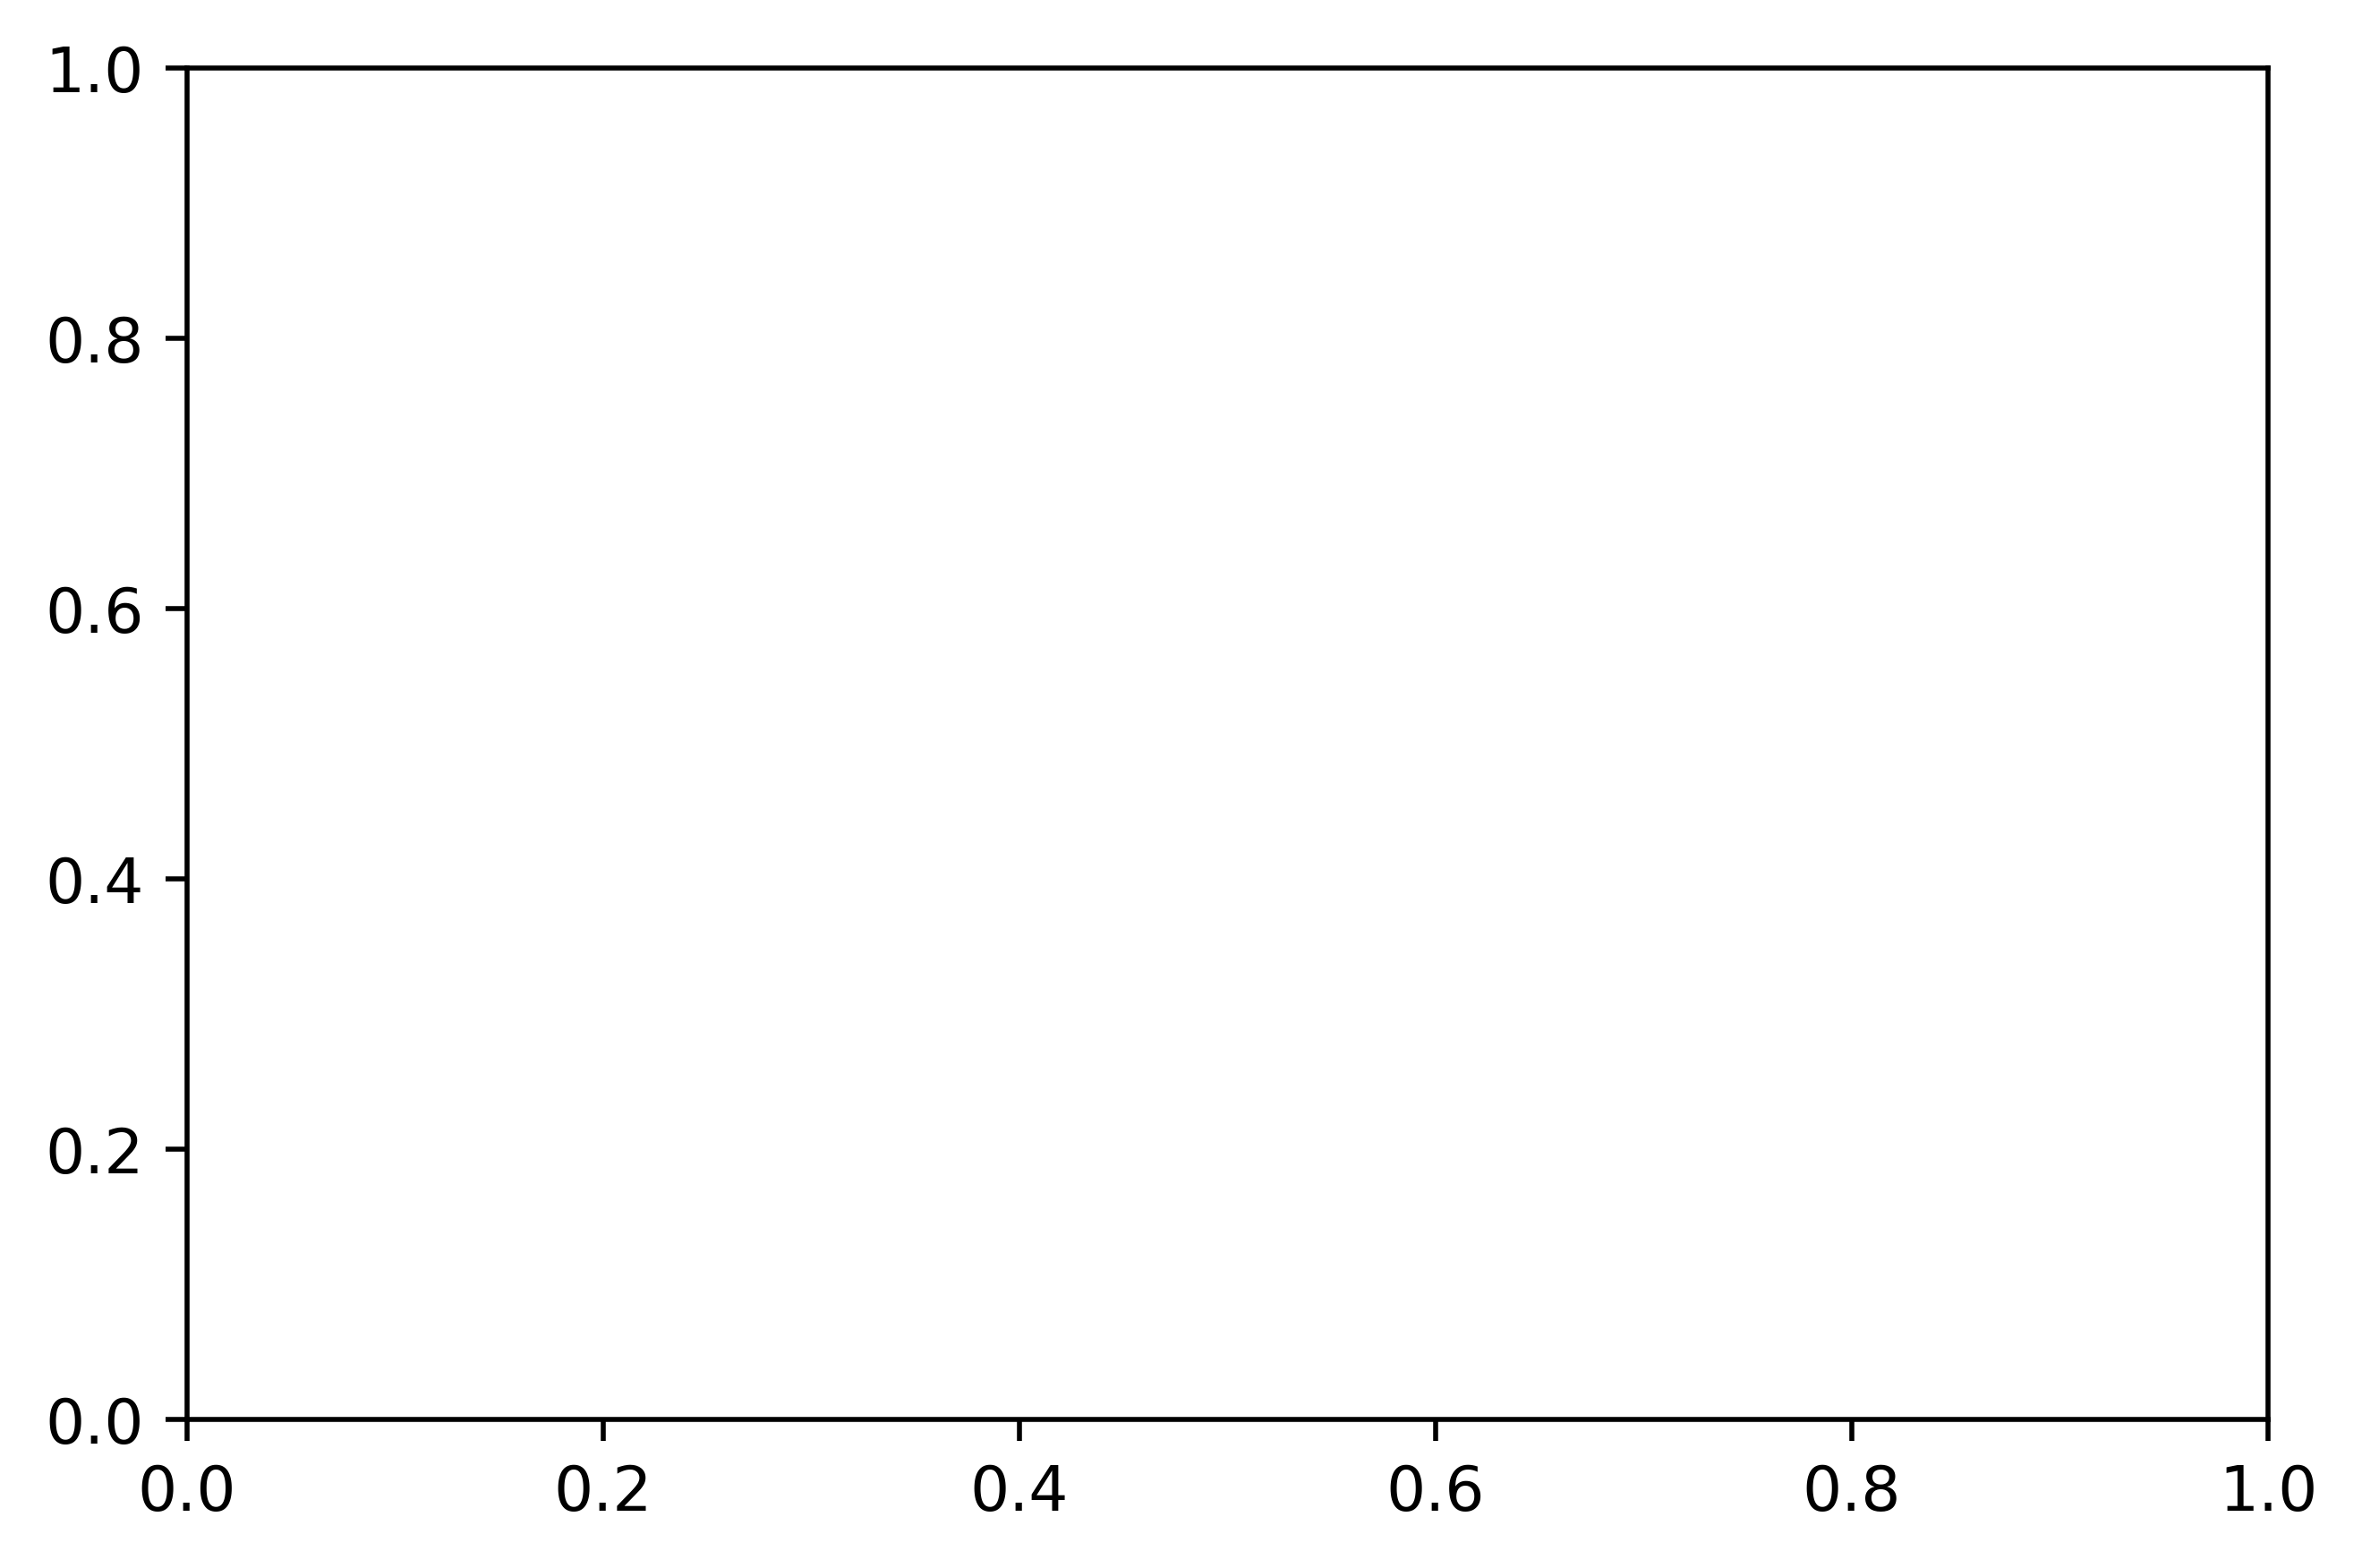

In [2]:
n_samples = 3
X, y = create_data_for_sktime(n_samples)
n_experiments = 10

#time series concatenation
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", RandomIntervalSpectralForest(n_estimators=100)),
]
clf_concat = Pipeline(steps)
#column ensembling
est = [
        ("RISE0", RandomIntervalSpectralForest(n_estimators=100), [0]),
        ("RISE1", RandomIntervalSpectralForest(n_estimators=100), [1]),
    ]
clf_ens = ColumnEnsembleClassifier(estimators=est)
    

scores = {'concat':np.empty(n_experiments), 'ens':np.empty(n_experiments)}
for i in range(n_experiments):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)
    clf_concat.fit(X_train, y_train)
    scores['concat'][i] = clf_concat.score(X_test, y_test)
    clf_ens.fit(X_train, y_train)
    scores['ens'][i] = clf_ens.score(X_test, y_test)
    

print('Column Concatenation Score:', np.mean(scores['concat']))

print('Column Ensemble Score:', np.mean(scores['ens']))